### 네이버 영화 평점을 보여주는 사이트에 접근

In [219]:
from bs4 import BeautifulSoup  
import pandas as pd

In [223]:
from urllib.request import urlopen

url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


- 태그에서 영화 제목이 있는 곳만 찾기

In [236]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?

In [237]:
len(soup.find_all('div', 'tit5'))

49

- 영화 제목만 출력

In [238]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 49)] #제목만 찾을 때
movie_name

['다크 나이트',
 '킹 오브 프리즘 프라이드 더 히어로',
 '킹 오브 프리즘',
 '오즈의 마법사',
 '내 사랑',
 '서서평, 천천히 평온하게',
 '로보캅',
 '플립',
 '명탐정 코난:진홍의 연가',
 '헤드윅',
 '댄서',
 '이터널 선샤인',
 '샤인',
 '올드보이',
 '어네스트와 셀레스틴',
 '기쿠지로의 여름',
 '파도가 지나간 자리',
 '택시운전사',
 '눈길',
 '노무현입니다',
 '스타쉽 트루퍼스',
 '파이트 클럽',
 '청원',
 '토탈 리콜',
 '극장판 짱구는 못말려 : 습격!! 외계인 덩덩이',
 '연애담',
 '너의 이름은.',
 '슈퍼배드 3',
 '꿈의 제인',
 '심야식당2',
 '라라랜드',
 '카3: 새로운 도전',
 '오두막',
 '스파이더맨: 홈커밍',
 '옥자',
 '500일의 썸머',
 '복수는 나의 것',
 '덩케르크',
 '예수는 역사다',
 '매치 포인트',
 '7번째 내가 죽던 날',
 '위시 어폰',
 '47 미터',
 '친절한 금자씨',
 '송 투 송',
 '그 후',
 '박쥐',
 '싸이보그지만 괜찮아',
 '군함도']

- 평점만 출력

In [239]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)] #포인트를 찾을 수 있다
movie_point

['9.32',
 '9.28',
 '9.25',
 '9.23',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.18',
 '9.14',
 '9.10',
 '9.09',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.99',
 '8.94',
 '8.93',
 '8.91',
 '8.91',
 '8.87',
 '8.86',
 '8.84',
 '8.76',
 '8.76',
 '8.74',
 '8.71',
 '8.62',
 '8.59',
 '8.58',
 '8.49',
 '8.47',
 '8.47',
 '8.39',
 '8.34',
 '8.31',
 '8.14',
 '7.97',
 '7.84',
 '7.71',
 '7.40',
 '7.26',
 '7.03',
 '6.60',
 '6.09',
 '5.17',
 '4.95']

In [240]:
date = pd.date_range('2007-5-1', periods=100, freq='D')
date

DatetimeIndex(['2007-05-01', '2007-05-02', '2007-05-03', '2007-05-04',
               '2007-05-05', '2007-05-06', '2007-05-07', '2007-05-08',
               '2007-05-09', '2007-05-10', '2007-05-11', '2007-05-12',
               '2007-05-13', '2007-05-14', '2007-05-15', '2007-05-16',
               '2007-05-17', '2007-05-18', '2007-05-19', '2007-05-20',
               '2007-05-21', '2007-05-22', '2007-05-23', '2007-05-24',
               '2007-05-25', '2007-05-26', '2007-05-27', '2007-05-28',
               '2007-05-29', '2007-05-30', '2007-05-31', '2007-06-01',
               '2007-06-02', '2007-06-03', '2007-06-04', '2007-06-05',
               '2007-06-06', '2007-06-07', '2007-06-08', '2007-06-09',
               '2007-06-10', '2007-06-11', '2007-06-12', '2007-06-13',
               '2007-06-14', '2007-06-15', '2007-06-16', '2007-06-17',
               '2007-06-18', '2007-06-19', '2007-06-20', '2007-06-21',
               '2007-06-22', '2007-06-23', '2007-06-24', '2007-06-25',
      

5월 1일부터 100일간으로 정의해 그 날짜에 해당하는 영화 정보 전체를 찾기 위해 date를 정해주었다.

- 날짜별 영화순위에 따른 이름과 평점 정리

In [242]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []
  
for today in tqdm_notebook(date):
    html = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

<ipython-input-242-b75e1df7e44a>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


In [243]:
len(movie_date), len(movie_name), len(movie_point)

(2458, 2458, 2458)

- 제목과 포인트를 읽어와서 pandas로 저장

In [244]:
import pandas as pd
movie = pd.DataFrame({'date': movie_date,
                      'name': movie_name, 
                      'point': movie_point})

movie.head()

,date,name,point
0,2007-05-01,"지금, 만나러 갑니다",9.19
1,2007-05-01,우리 학교,9.17
2,2007-05-01,타인의 삶,9.16
3,2007-05-01,혐오스런 마츠코의 일생,9.10
4,2007-05-01,러브 액츄얼리,9.06


In [245]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2458 non-null   datetime64[ns]
 1   name    2458 non-null   object        
 2   point   2458 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 57.7+ KB


In [246]:
movie['point'] = movie['point'].astype(float)

- 5월 1일부터 100일간 점수의 합산

In [247]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values('point', ascending=False)
movie_best.head()

,point
name,
우리 학교,892.56
타인의 삶,657.55
혐오스런 마츠코의 일생,617.46
스파이더맨 3,589.66
캐리비안의 해적 - 세상의 끝에서,563.04


- 영화를 선택해 확인

In [248]:
tmp = movie.query('name == ["타인의 삶"]')
tmp

,date,name,point
2,2007-05-01,타인의 삶,9.16
38,2007-05-02,타인의 삶,9.16
74,2007-05-03,타인의 삶,9.16
106,2007-05-04,타인의 삶,9.16
138,2007-05-05,타인의 삶,9.16
...,...,...,...
1709,2007-07-07,타인의 삶,9.09
1733,2007-07-08,타인의 삶,9.06
1754,2007-07-09,타인의 삶,9.06
1775,2007-07-10,타인의 삶,9.06


- 날짜별로 그래프

No handles with labels found to put in legend.


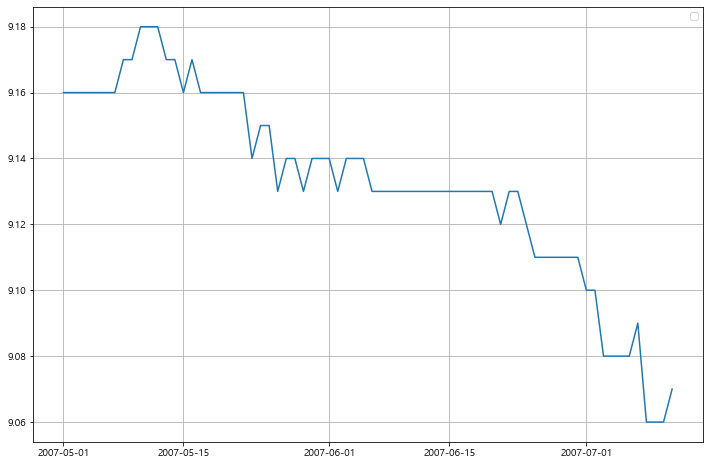

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

- 상위 10개의 영화

In [250]:
movie_best.head(10)

,point
name,
우리 학교,892.56
타인의 삶,657.55
혐오스런 마츠코의 일생,617.46
스파이더맨 3,589.66
캐리비안의 해적 - 세상의 끝에서,563.04
밀양,510.06
리핑 - 10개의 재앙,441.33
쉬즈 더 맨,427.38
못말리는 결혼,411.02


### 영화별 날짜 변화에 따른 평점 변화 확인

In [255]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], values=['point'])

movie_pivot.head()

point                                                             \
name        1408   300 4.4.4. 가족의 탄생 검은 집 고스트 라이더  괴물 굿 셰퍼드 그 여자 작사 그 남자 작곡   
date                                                                          
2007-05-01   NaN  8.11    NaN    NaN  NaN    4.56 NaN  6.86             NaN   
2007-05-02   NaN  8.11    NaN    NaN  NaN    4.56 NaN  6.85             NaN   
2007-05-03   NaN  8.11    NaN    NaN  NaN    4.56 NaN  6.85             NaN   
2007-05-04   NaN  8.11    NaN    NaN  NaN    4.56 NaN  6.86             NaN   
2007-05-05   NaN  8.11    NaN    NaN  NaN    4.56 NaN  6.85             NaN   

                   ...                                             \
name       그놈 목소리  ... 해리 포터와 불사조 기사단 해리 포터와 불의 잔 해부학교실    향수 헤드윅   
date               ...                                              
2007-05-01    NaN  ...            NaN         NaN   NaN  8.08 NaN   
2007-05-02    NaN  ...            NaN         NaN   NaN  8.08 NaN   
2007-05-03    NaN  ...            NaN         NaN   NaN  8.08 NaN   
2007-05-04    NaN  ...            NaN         NaN   NaN  8.08 NaN   
2007-05-05    NaN  ...            NaN         NaN   NaN  8.09 NaN   

                                                
name       혐오스런 마츠코의 일생 화려한 휴가 황진이 후회하지 않아  힛쳐  
date                                            
2007-05-01         9.10    NaN NaN     NaN NaN  
2007-05-02         9.11    NaN NaN     NaN NaN  
2007-05-03         9.13    NaN NaN     NaN NaN  
2007-05-04         9.13    NaN NaN     NaN NaN  
2007-05-05         9.13    NaN NaN     NaN NaN  

[5 rows x 107 columns]

pivot_table을 이용해 세로축에 날짜, 가로축에 영화제목을 넣어주었다.

In [256]:
movie_pivot.columns = movie_pivot.columns.droplevel()

movie_pivot.head()

name,1408,300,4.4.4.,가족의 탄생,검은 집,고스트 라이더,괴물,굿 셰퍼드,그 여자 작사 그 남자 작곡,그놈 목소리,...,해리 포터와 불사조 기사단,해리 포터와 불의 잔,해부학교실,향수,헤드윅,혐오스런 마츠코의 일생,화려한 휴가,황진이,후회하지 않아,힛쳐
date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,NaN,8.11,NaN,NaN,NaN,4.56,NaN,6.86,NaN,NaN,...,NaN,NaN,NaN,8.08,NaN,9.10,NaN,NaN,NaN,NaN
2007-05-02,NaN,8.11,NaN,NaN,NaN,4.56,NaN,6.85,NaN,NaN,...,NaN,NaN,NaN,8.08,NaN,9.11,NaN,NaN,NaN,NaN
2007-05-03,NaN,8.11,NaN,NaN,NaN,4.56,NaN,6.85,NaN,NaN,...,NaN,NaN,NaN,8.08,NaN,9.13,NaN,NaN,NaN,NaN
2007-05-04,NaN,8.11,NaN,NaN,NaN,4.56,NaN,6.86,NaN,NaN,...,NaN,NaN,NaN,8.08,NaN,9.13,NaN,NaN,NaN,NaN
2007-05-05,NaN,8.11,NaN,NaN,NaN,4.56,NaN,6.85,NaN,NaN,...,NaN,NaN,NaN,8.09,NaN,9.13,NaN,NaN,NaN,NaN


- 영화 몇개를 지정해서 날짜별 변화 확인

In [257]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print("Windows")
else:
    print("Unknown system...")

Windows


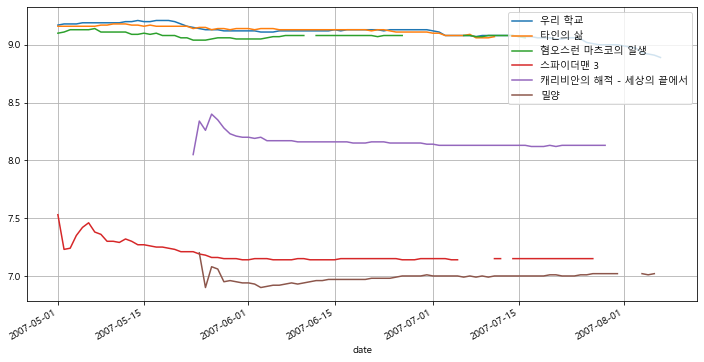

In [258]:
movie_pivot.plot(y=["우리 학교", "타인의 삶", "혐오스런 마츠코의 일생",
                    "스파이더맨 3", "캐리비안의 해적 - 세상의 끝에서", "밀양"], 
                 figsize=(12, 6))
plt.legend(loc='upper right')
plt.grid()
plt.show()

영화 "우리 학교", "타인의 삶", "혐오스런 마츠코의 일생", "스파이더맨 3", "캐리비안의 해적 - 세상의 끝에서", "밀양"의 변화 추이와 평점 결과를 나타내고 있다.